In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
url = 'https://raw.githubusercontent.com/ryuuft/aula_ml/master/case1.csv'
df = pd.read_csv(url)

In [54]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [55]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [56]:
print(df['timeStamp'].max(),df['timeStamp'].min())

2016-08-24 11:17:02 2015-12-10 17:40:00


In [57]:
df['title'].value_counts()

Traffic: VEHICLE ACCIDENT -        23066
Traffic: DISABLED VEHICLE -         7702
Fire: FIRE ALARM                    5496
EMS: RESPIRATORY EMERGENCY          5112
EMS: CARDIAC EMERGENCY              5012
                                   ...  
EMS: DISABLED VEHICLE                  1
Fire: UNKNOWN MEDICAL EMERGENCY        1
Fire: PLANE CRASH                      1
EMS: PLANE CRASH                       1
Fire: DIABETIC EMERGENCY               1
Name: title, Length: 110, dtype: int64

In [58]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [59]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [0]:
def get_tipo_ligacao(title):
  index = title.index(':')
  return title[:index]

In [61]:
get_tipo_ligacao(df['title'].iloc[0])

'EMS'

In [62]:
df['tipo_ligacao'] = df['title'].apply(lambda title: get_tipo_ligacao(title))
df['tipo_ligacao'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: tipo_ligacao, dtype: int64

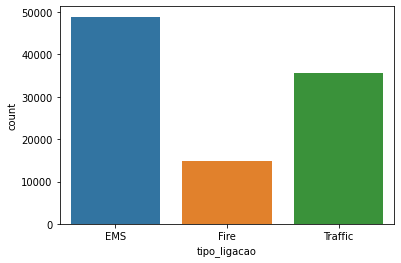

In [63]:
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x='tipo_ligacao', data = df)

In [64]:
print(type(df['timeStamp'].iloc[0]))
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
print(type(df['timeStamp'].iloc[0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [0]:
df['mes_ligacao'] = df['timeStamp'].apply(lambda x: x.month)
df['hora_ligacao'] = df['timeStamp'].apply(lambda x: x.hour)
df['dia_semana_ligacao'] = df['timeStamp'].apply(lambda x: x.dayofweek)

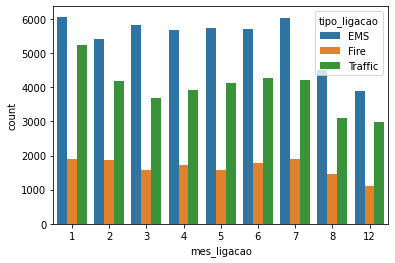

In [66]:
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x = 'mes_ligacao', hue = 'tipo_ligacao', data = df)

In [0]:
map_week = {
    0: 'Seg',
    1: 'Ter',
    2: 'Qua',
    3: 'Qui',
    4: 'Sex',
    5: 'Sab',
    6: 'Dom'
}
df['dia_semana_ligacao_2'] = df['dia_semana_ligacao'].map(map_week)

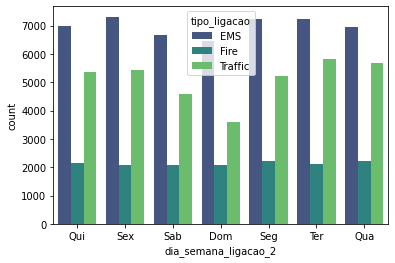

In [68]:
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x = 'dia_semana_ligacao_2', hue = 'tipo_ligacao', data = df, palette = 'viridis')

In [0]:
map_target = {
    'EMS': 0,
    'Traffic': 1,
    'Fire': 2
}
df['target'] = df['tipo_ligacao'].map(map_target)

In [0]:
df_month = df.groupby(by='mes_ligacao').count()

In [71]:
df_month.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,tipo_ligacao,hora_ligacao,dia_semana_ligacao,dia_semana_ligacao_2,target
mes_ligacao,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423


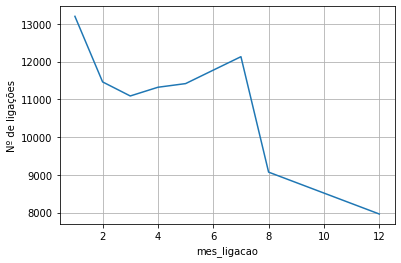

In [72]:
df_month['twp'].plot()
plt.ylabel('Nº de ligações')
plt.grid(True)

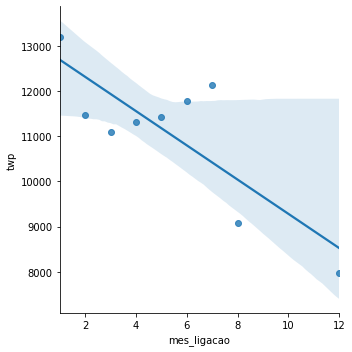

In [73]:
sns.lmplot(x="mes_ligacao", y="twp", data=df_month.reset_index())

In [74]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'tipo_ligacao', 'mes_ligacao', 'hora_ligacao', 'dia_semana_ligacao',
       'dia_semana_ligacao_2', 'target'],
      dtype='object')

In [0]:
variables = ['lat', 'lng', 'zip', 'mes_ligacao', 'hora_ligacao', 'dia_semana_ligacao', 'twp', 'addr']

In [0]:
v_categoricas = ['twp', 'addr']

In [0]:
for categoria in v_categoricas:
  df[categoria] = df[categoria].map(df.groupby(categoria)['target'].mean())

In [0]:
df['twp'].fillna(0, inplace = True)
df['addr'].fillna(0, inplace = True)
df['zip'].fillna(0, inplace = True)

In [109]:
df.isna().sum()

lat                         0
lng                         0
desc                        0
zip                     12855
title                       0
timeStamp                   0
twp                         0
addr                        0
e                           0
tipo_ligacao                0
mes_ligacao                 0
hora_ligacao                0
dia_semana_ligacao          0
dia_semana_ligacao_2        0
target                      0
dtype: int64

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [0]:
rf_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')

In [0]:
df.sort_values(by = 'timeStamp', ascending=True, inplace = True)

In [0]:
data_split = pd.to_datetime('2016-06-01')
df_train = df[df['timeStamp']<= data_split]
df_test = df[df['timeStamp'] > data_split]

In [116]:
df_train.shape

(66491, 15)

In [117]:
df_test.shape

(33001, 15)

In [0]:
from sklearn.preprocessing import StandardScaler

In [119]:
scaler = StandardScaler()
X_train = df_train[variables]
y_train = df_train['target']
X_test = df_test[variables]
y_test = df_test['target']
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [120]:
rf_model.fit(scaler.fit_transform(X_train), y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
importancia = rf_model.feature_importances_
index_top3 = sorted(range(len(importancia)), key = lambda i: importancia[i])[-3:]

In [127]:
print(variables[1], importancia[1])

lng 0.1096432271174435


In [128]:
print(variables[4], importancia[4])

hora_ligacao 0.1286443887285553


In [129]:
print(variables[7], importancia[7])

addr 0.40250614502976484


In [0]:
predicts = rf_model.predict(X_test)

In [135]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       0.79      0.57      0.66     16257
           1       0.50      0.76      0.60     11574
           2       0.53      0.37      0.44      5170

    accuracy                           0.60     33001
   macro avg       0.61      0.57      0.57     33001
weighted avg       0.65      0.60      0.60     33001



In [136]:
map_target

{'EMS': 0, 'Fire': 2, 'Traffic': 1}

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=3)

In [140]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [144]:
print(classification_report(kmeans.predict(X_train), y_train))

              precision    recall  f1-score   support

           0       0.36      0.47      0.41     24923
           1       0.18      0.51      0.26      8531
           2       0.48      0.14      0.22     33037

    accuracy                           0.31     66491
   macro avg       0.34      0.37      0.30     66491
weighted avg       0.40      0.31      0.30     66491

